23_24

In [10]:
# importación de datos
import seaborn as sns
penguins = sns.load_dataset('penguins')

# Quitamos el campo del peso
penguins = penguins[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex']]

# Eliminar filas con valores NaN en cualquier columna
penguins = penguins.dropna()

# Mapear las islas a valores numéricos
island_mapping = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}

# Aplicar el mapeo a la columna 'island'
penguins['island'] = penguins['island'].replace(island_mapping)

# Mapear los valores de 'Male' y 'Female' a 0 y 1, respectivamente
sex_mapping = {'Male': 0, 'Female': 1}

# Aplicar el mapeo a la columna 'sex'
penguins['sex'] = penguins['sex'].replace(sex_mapping)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,0,39.1,18.7,181.0,0
1,Adelie,0,39.5,17.4,186.0,1
2,Adelie,0,40.3,18.0,195.0,1
4,Adelie,0,36.7,19.3,193.0,1
5,Adelie,0,39.3,20.6,190.0,0
...,...,...,...,...,...,...
338,Gentoo,1,47.2,13.7,214.0,1
340,Gentoo,1,46.8,14.3,215.0,1
341,Gentoo,1,50.4,15.7,222.0,0
342,Gentoo,1,45.2,14.8,212.0,1


In [11]:

# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.33, random_state=1)


In [12]:
# 1. elegimos clasificador
from sklearn.naive_bayes import GaussianNB
# 2. instanciamos el modelo
model = GaussianNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

GaussianNB()

In [13]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo'

In [14]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo


0.8545454545454545

In [15]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    accuracy = accuracy_score(y_true, y_pred)

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap='Purples')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
            
    ax.text(0.5, -0.4, f'Accuracy: {accuracy:.2%}', ha='center', transform=ax.transAxes)
    
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, x=0.6, y=1.05, ha='center')
    return ax

In [16]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

,species
65,0
276,1
186,2
198,2
293,1
...,...
169,2
153,2
48,0
128,0


In [17]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2,
       1, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0,
       2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2],
      dtype=int64)

Confusion matrix, without normalization
[[31  0 16]
 [ 0 36  0]
 [ 0  0 27]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

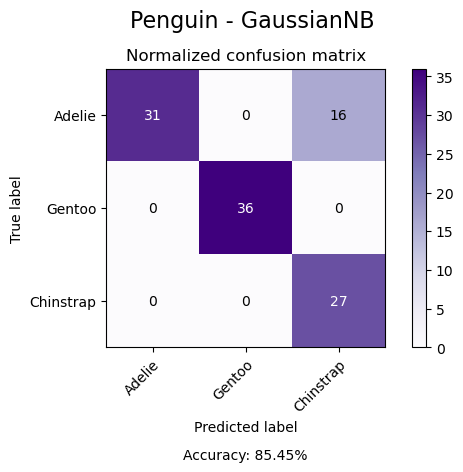

In [18]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(['Adelie', 'Gentoo', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='Penguin - GaussianNB')